## Problem Statement:
The increase of commercial commodities and fancy foods may create an imbalance in the nutrition of Americans. Hence the Department of Agriculture decides to maintain balance by finding out the right nutrition from the dataset. As the features are more, they decide to hire an Analyst who can help them by applying some the Machine Learning techniques such as PCA and Kmeans clustering to reduce the components and visually analyze the same.

## Tasks to be performed:
In order to help out, the Department of Agriculture below tasks should be performed,

1. Import and preprocess the data.
2. Fit and transform the data on the PCA model.
3. Calculate the variance ratio and plot the same to find the principal components. 
4. Fit and transform the PCA model for the principal components found.
5. Create a Kmeans model for the PCA components.
6. Add the components and the clusters found by PCA and K-means to the scaled data. 
7. Visualize the components (1 and 2) based on its first five k-means cluster.
8. Find out the rich nutrients in each component.


In [76]:
# importing the libraries
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [77]:
nutrients = pd.read_csv('/content/drive/MyDrive/Datasets/USA_Nutrition_Data.csv')
nutrients.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [78]:
nutrients.shape

(8618, 45)

In [79]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   int64  
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   int64  
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [80]:
used = []
corrs = []

for i,j in enumerate(nutrients.corr().columns):
  for k in range(len(nutrients.corr())):
    if ((nutrients.corr().iloc[k,i]>0.9) &
        (j not in used) &
        (j!= nutrients.corr().index[k])):
      
        used.append(j)
        corrs.append((j, nutrients.corr().index[k],
                      np.round(nutrients.corr().iloc[k,i],2)))
        
corrs_nutrients = pd.DataFrame([[i[0] for i in corrs],
                                [i[1] for i in corrs],
                                [i[2] for i in corrs]])

corrs_nutrients = corrs_nutrients.T.rename(columns={0:'column',1:'row',2:'corr'})
corrs_nutrients[:15]

,column,row,corr
0,VitA_mcg,VitA_USRDA,1.0
1,VitB6_mg,VitB6_USRDA,1.0
2,VitB12_mcg,VitB12_USRDA,1.0
3,VitC_mg,VitC_USRDA,1.0
4,VitE_mg,VitE_USRDA,1.0
5,Folate_mcg,Folate_USRDA,1.0
6,Niacin_mg,Niacin_USRDA,1.0
7,Riboflavin_mg,Riboflavin_USRDA,1.0
8,Thiamin_mg,Thiamin_USRDA,1.0
9,Calcium_mg,Calcium_USRDA,1.0


We can see that the "_USRDA" features are redundant. They should be removed.

In [81]:
# dropping _USRDA features
nutrients.drop(nutrients.columns[nutrients.columns.str.contains('_USRDA')].values, inplace=True, axis=1)


Dropping first six categorical features as PCA and k-means clustering does not affect them much.

In [82]:
# dropping the categorical features as well
nutrients.set_index('ID', inplace=True) 
nutrients_desc = nutrients.iloc[:, :6]
nutrients.drop(nutrients.columns[:6].values, axis=1, inplace=True)


We need to perform Scaling before applying PCA since PCA creates the Principal Component 1 in the direction of the maximum variance. But, if we do not scale, some features in our dataset might show high variance because of their larger values.

This is why it is strongly advisable to scale the data before applying the PCA technique.

StandardScaler() will normalize each column of the dataset INDIVIDUALLY so that each column or feature or variable will have mean = 0 and standard deviation = 1.


In [83]:
# standardizing the data
nutrients_TF = StandardScaler().fit_transform(nutrients)


In [84]:
# printing the shape of the data
nutrients_TF.shape


(8618, 23)

Fit and transform the data on the PCA model

In [85]:
# from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(nutrients_TF)

array([[-1.12177585e+00, -1.18225141e+00, -3.66193973e+00, ...,
         2.08470136e-01, -3.98100905e-02,  3.70138174e-02],
       [-1.11468691e+00, -1.18417302e+00, -3.66232928e+00, ...,
         2.22450074e-01, -3.76157809e-02,  3.68193054e-02],
       [-9.94919411e-01, -1.57357953e+00, -4.69772411e+00, ...,
         2.38667900e-01, -7.22173197e-02,  4.31958958e-02],
       ...,
       [-7.67670698e-01, -3.26765632e+00,  9.85205562e-01, ...,
         3.64559090e-01, -1.48468056e-01,  8.65889021e-02],
       [ 3.55897094e-01,  6.78435359e-01, -1.00293556e+00, ...,
        -8.24537105e-01,  1.12523136e-01, -4.86965696e-02],
       [-8.66889802e-01,  1.19845904e+00,  1.93486895e-01, ...,
        -1.53381540e-01,  2.30499506e-01, -1.91554534e-03]])

Calculate the variance ratio and plot the same to find the principal components.

In [86]:
pca.explained_variance_ratio_

array([2.36925468e-01, 1.13846015e-01, 8.83433734e-02, 8.17013669e-02,
       7.11161480e-02, 4.95813332e-02, 4.61246638e-02, 4.02719041e-02,
       3.74790508e-02, 3.58559322e-02, 3.17927198e-02, 2.59519549e-02,
       2.21153503e-02, 2.04113766e-02, 1.77385355e-02, 1.46927827e-02,
       1.43290735e-02, 1.39668837e-02, 1.11392349e-02, 1.03538827e-02,
       9.18082227e-03, 6.91711649e-03, 1.65010749e-04])

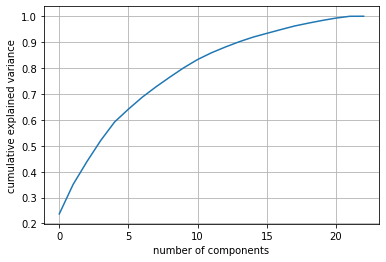

In [87]:
pca = PCA().fit(nutrients_TF)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.grid(True)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From above, we can observe that the explained variance ratio after 10 is negligible.

##Fit and transform the PCA model for the principal components found

In [88]:
pca = PCA(n_components=10)
pca.fit(nutrients_TF)

PCA(n_components=10)

In [89]:
scores_pca = pca.transform(nutrients_TF)

In [90]:
print(pca.explained_variance_ratio_[:10].sum())

0.8012449089258284


We can observe that first 10 eigenvectors account for almost 80% of the variance.

##Create a K-means model for the PCA components

In [91]:
#Set a 5 KMeans clustering
from sklearn.cluster import KMeans
kmeans_pca=KMeans(n_clusters=10, init='k-means++', random_state=42) 
kmeans_pca.fit(nutrients_TF)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

K-means starts with allocating cluster centers randomly and then looks for "better" solutions. K-means++ starts with allocation one cluster center randomly and then searches for other centers given the first one

Hence we use K-means++

## Add the components and the clusters found by PCA and K-means to the scaled data

In [92]:
nutrients_seg_pca_kmeans=pd.concat([nutrients.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
nutrients_seg_pca_kmeans.columns.values[-10: ]=['Component1','Component2','Component3','Component4','Component5','Component6','Component7','Component8','Component9','Component10']
nutrients_seg_pca_kmeans['segment_kmeans_pca']=kmeans_pca.labels_ 
nutrients_seg_pca_kmeans.head()


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Component2,Component3,Component4,Component5,Component6,Component7,Component8,Component9,Component10,segment_kmeans_pca
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,...,-1.182252,-3.661943,1.080918,-3.084169,0.837864,0.331000,-0.554761,-0.620300,1.426357,2
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,...,-1.184174,-3.662332,1.090736,-3.077438,0.836953,0.323362,-0.551788,-0.630412,1.432284,2
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,...,-1.573580,-4.697728,1.317309,-3.912694,0.940026,0.373838,-0.538361,-0.697492,1.763618,2
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,...,0.566069,-1.905058,-0.834513,0.438097,0.051371,1.708944,-1.160328,-0.394677,0.275329,0
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,...,0.537657,-2.307576,-0.903857,0.875455,0.014243,2.157857,-1.460110,-0.482494,0.282776,0


##Visualize the components (1 and 2) based on its first five k-means cluster

In [96]:
nutrients_seg_pca_kmeans['Segment']=nutrients_seg_pca_kmeans['segment_kmeans_pca'].map({0:'first',
                                                                                        1:'second',
                                                                                        2:'third',
                                                                                        3:'fourth',
                                                                                        4:'fifth'})
#5:'sixth',
#6:'seventh',
#7:'eighth',
#8:'ninth'})


In [97]:
nutrients_seg_pca_kmeans['Segment'].value_counts()

fourth    3311
first     2888
fifth     1624
third      233
second     216
Name: Segment, dtype: int64

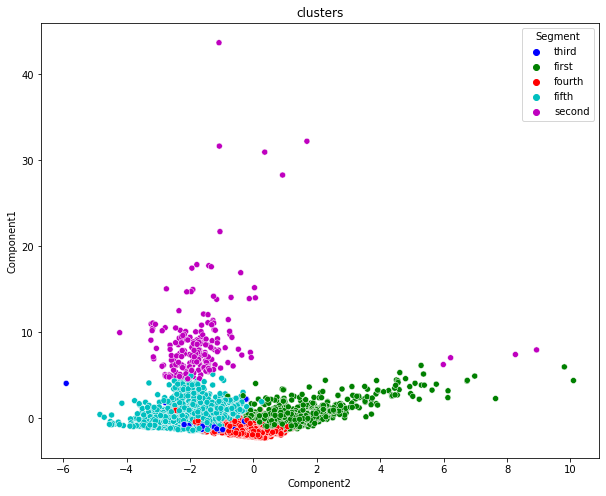

In [98]:
import seaborn as sns
x_axis= nutrients_seg_pca_kmeans['Component2'] 
y_axis= nutrients_seg_pca_kmeans['Component1'] 
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis,y=y_axis,hue=nutrients_seg_pca_kmeans['Segment'],palette=['b','g','r','c','m'])
plt.title('clusters')
plt.show()

##Find out the the rich nutrients in each component

In [100]:
vects = pca.components_[:10]

first = pd.Series(vects[0], index=nutrients.columns) 
first.sort_values(ascending=False)


Riboflavin_mg    0.341325
Niacin_mg        0.337779
VitB6_mg         0.315663
Iron_mg          0.299857
Folate_mcg       0.284102
Thiamin_mg       0.272453
Zinc_mg          0.243551
Magnesium_mg     0.241349
Phosphorus_mg    0.199403
Fiber_g          0.181570
Copper_mcg       0.180806
VitB12_mcg       0.177985
Carb_g           0.169685
Calcium_mg       0.168112
Energy_kcal      0.157814
Protein_g        0.140620
VitE_mg          0.137122
VitA_mcg         0.133519
Manganese_mg     0.093567
Selenium_mcg     0.092319
VitC_mg          0.087639
Sugar_g          0.076323
Fat_g            0.033008
dtype: float64

First component is rich in Riboflavin_mg, Niacin_mg and VitB6

In [101]:
second = pd.Series(vects[1], index=nutrients.columns) 
second.sort_values(ascending=False)

VitB12_mcg       0.355044
Protein_g        0.343397
Selenium_mcg     0.239322
VitA_mcg         0.236469
Copper_mcg       0.212670
Zinc_mg          0.177797
Manganese_mg     0.088784
Phosphorus_mg    0.087448
Niacin_mg        0.084801
Riboflavin_mg    0.073471
VitB6_mg         0.021129
VitC_mg         -0.038524
Thiamin_mg      -0.075151
Iron_mg         -0.093812
Folate_mcg      -0.097093
Magnesium_mg    -0.103362
Calcium_mg      -0.105173
VitE_mg         -0.106372
Fat_g           -0.111670
Fiber_g         -0.257733
Energy_kcal     -0.273449
Sugar_g         -0.358769
Carb_g          -0.443416
dtype: float64

Second component is rich in VitaminB12 and Protein

In [102]:
third = pd.Series(vects[2], index=nutrients.columns) 
third.sort_values(ascending=False)

Folate_mcg       0.230985
Riboflavin_mg    0.192099
Thiamin_mg       0.184349
VitB6_mg         0.174649
Niacin_mg        0.164885
VitC_mg          0.162303
Iron_mg          0.087112
Sugar_g          0.055245
Carb_g           0.049823
VitB12_mcg      -0.012763
VitA_mcg        -0.021934
Zinc_mg         -0.038641
Fiber_g         -0.040399
Manganese_mg    -0.072627
Calcium_mg      -0.128140
Copper_mcg      -0.152256
Selenium_mcg    -0.163361
Magnesium_mg    -0.201230
VitE_mg         -0.207331
Protein_g       -0.213568
Phosphorus_mg   -0.274812
Energy_kcal     -0.462006
Fat_g           -0.534051
dtype: float64

Third component is rich in Folate, Riboflavin and Thiamin

In [103]:
fourth = pd.Series(vects[3], index=nutrients.columns) 
fourth.sort_values(ascending=False)

VitA_mcg         0.530393
Copper_mcg       0.389932
VitB12_mcg       0.346550
Manganese_mg     0.311370
Sugar_g          0.217373
Carb_g           0.174108
Energy_kcal      0.052281
VitC_mg          0.047584
Riboflavin_mg    0.046993
Fiber_g          0.042130
Fat_g            0.026520
VitE_mg          0.026174
Folate_mcg      -0.032481
Iron_mg         -0.059442
Magnesium_mg    -0.071807
Calcium_mg      -0.099340
Thiamin_mg      -0.103518
VitB6_mg        -0.114373
Niacin_mg       -0.156391
Selenium_mcg    -0.161623
Zinc_mg         -0.166323
Phosphorus_mg   -0.207870
Protein_g       -0.311113
dtype: float64

Fourth component is rich in Vitamin-A, copper and Vitamin-B12

In [104]:
fifth = pd.Series(vects[4], index=nutrients.columns) 
fifth.sort_values(ascending=False)

Calcium_mg       0.388686
Magnesium_mg     0.352732
Phosphorus_mg    0.344936
Fiber_g          0.332158
Copper_mcg       0.161256
Manganese_mg     0.125607
Iron_mg          0.097117
Carb_g           0.082726
VitC_mg          0.024713
Protein_g        0.013175
VitA_mcg         0.008125
Selenium_mcg    -0.005049
Sugar_g         -0.048425
VitB12_mcg      -0.058866
Zinc_mg         -0.064324
VitB6_mg        -0.133742
Folate_mcg      -0.137698
Riboflavin_mg   -0.153452
Thiamin_mg      -0.161527
Niacin_mg       -0.203436
VitE_mg         -0.238018
Energy_kcal     -0.293595
Fat_g           -0.394451
dtype: float64

Fifth Component is rich in Calcium, Magnesium and Phosphorus

In [105]:
sixth = pd.Series(vects[5], index=nutrients.columns) 
sixth.sort_values(ascending=False)

VitC_mg          0.545237
VitE_mg          0.475309
VitB6_mg         0.200581
Manganese_mg     0.182636
Magnesium_mg     0.139930
Fiber_g          0.134812
Fat_g            0.116480
Calcium_mg       0.070468
VitA_mcg         0.038817
Niacin_mg        0.026340
Iron_mg         -0.030420
Riboflavin_mg   -0.050740
Zinc_mg         -0.054644
Folate_mcg      -0.054676
Phosphorus_mg   -0.083699
Copper_mcg      -0.085932
VitB12_mcg      -0.123265
Thiamin_mg      -0.130108
Energy_kcal     -0.132845
Protein_g       -0.141499
Selenium_mcg    -0.243757
Carb_g          -0.279308
Sugar_g         -0.337095
dtype: float64

Sixth component is rich in VitC_mg, VitE_mg, VitB6_mg

In [107]:
seventh = pd.Series(vects[6], index=nutrients.columns) 
seventh.sort_values(ascending=False)

Calcium_mg       0.462802
VitC_mg          0.451293
Phosphorus_mg    0.323555
Sugar_g          0.298583
Riboflavin_mg    0.141748
VitA_mcg         0.101242
Energy_kcal      0.066831
VitB12_mcg       0.056040
Niacin_mg        0.045774
Fat_g            0.045315
VitB6_mg         0.024703
Carb_g           0.022103
Protein_g        0.006282
Selenium_mcg    -0.021886
Thiamin_mg      -0.071883
Zinc_mg         -0.105981
Copper_mcg      -0.119076
VitE_mg         -0.125433
Folate_mcg      -0.130927
Iron_mg         -0.133269
Manganese_mg    -0.136458
Magnesium_mg    -0.269694
Fiber_g         -0.414757
dtype: float64

Seventh component is rich in Calcium_mg, VitC_mg and Phosphorus_mg

In [108]:
eighth = pd.Series(vects[7], index=nutrients.columns) 
eighth.sort_values(ascending=False)

VitC_mg          0.515926
Selenium_mcg     0.410344
Magnesium_mg     0.191715
Fiber_g          0.187860
Copper_mcg       0.187729
Carb_g           0.155032
Sugar_g          0.143568
Protein_g        0.116331
VitB6_mg         0.083210
Energy_kcal      0.074389
Zinc_mg          0.034042
Niacin_mg        0.010485
VitB12_mcg       0.004594
Riboflavin_mg   -0.044710
VitA_mcg        -0.046072
Fat_g           -0.049576
Iron_mg         -0.107689
VitE_mg         -0.148569
Folate_mcg      -0.162206
Phosphorus_mg   -0.170331
Thiamin_mg      -0.190384
Manganese_mg    -0.346042
Calcium_mg      -0.366959
dtype: float64

Eighth component is rich in VitC_mg, Selenium_mcg and Magnesium_mg

In [109]:
ninth = pd.Series(vects[8], index=nutrients.columns) 
ninth.sort_values(ascending=False)

Manganese_mg     0.756725
Selenium_mcg     0.358306
Sugar_g          0.151392
Protein_g        0.148591
Niacin_mg        0.120637
Carb_g           0.117628
VitC_mg          0.085471
Energy_kcal      0.041475
Magnesium_mg     0.032148
Thiamin_mg       0.027045
VitB6_mg         0.022823
Phosphorus_mg   -0.012858
VitA_mcg        -0.021300
Riboflavin_mg   -0.044893
VitE_mg         -0.061877
Folate_mcg      -0.064212
Fiber_g         -0.065544
Fat_g           -0.091577
Zinc_mg         -0.108492
Iron_mg         -0.109233
VitB12_mcg      -0.131807
Calcium_mg      -0.135747
Copper_mcg      -0.362648
dtype: float64

Ninth component is rich in Manganese_mg, Selenium_mcg and Sugar_g

In [110]:
tenth = pd.Series(vects[9], index=nutrients.columns) 
tenth.sort_values(ascending=False)

Thiamin_mg       0.438528
Fat_g            0.200698
Riboflavin_mg    0.195209
VitC_mg          0.155493
Energy_kcal      0.141076
VitA_mcg         0.118249
Magnesium_mg     0.110877
Niacin_mg        0.088149
Fiber_g          0.086611
Phosphorus_mg    0.061584
Copper_mcg       0.046820
Protein_g        0.018391
Folate_mcg       0.017541
Manganese_mg    -0.018240
Carb_g          -0.044020
Selenium_mcg    -0.075576
Calcium_mg      -0.080211
Iron_mg         -0.083314
VitB12_mcg      -0.133127
VitB6_mg        -0.198115
Sugar_g         -0.387953
VitE_mg         -0.424234
Zinc_mg         -0.477741
dtype: float64

Tenth component is rich in Thiamin_mg, Fat_g and Riboflavin_mg

##Inference:
Now instead of going through all the features in the dataset. Nutritionist from the Department of Agriculture can go through these five components and create a new nutrition plan 
